In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data and Initial Exploration to Understand Data

In [14]:
df = pd.read_csv('wine.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


In [15]:
# shape of the data

df.shape

(1103, 11)

The shape of the data is (1103,11), which shows there are 1103 rows and 11 columns in the data.
To know the columns of the data, we can do df.columns, it will give all the features name present in the data.

In [16]:
# features in data

df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

# Overview dataset

To understand our dataset in general, I can use Pandas’ info() method

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1103 non-null   int64  
 1   country      1103 non-null   object 
 2   description  1103 non-null   object 
 3   designation  834 non-null    object 
 4   points       1103 non-null   int64  
 5   price        1046 non-null   float64
 6   province     1103 non-null   object 
 7   region_1     930 non-null    object 
 8   region_2     492 non-null    object 
 9   variety      1103 non-null   object 
 10  winery       1103 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 94.9+ KB


In the dataset/DataFrame we know:

Rows/Entries: 1103
Columns: 11
Type of columns: object mostly, points column is int64 and price column is float64

# Let's check if there is any missing value in the data.

Dataset might contain data that is negligible to us. My purpose of Wine Review is to train machine to understand the taste of each wine, later machine learning model can predict wine titles that related to new description. description data is quite significant to our machine learning and title, variety(type of grape) are relatively import to use as well. Reset of data we can just ignore.

Later I am going to do EDA(Exploratory Data Analysis), therefore, some of data I need to keep for good use.

I decide to drop columns:

- designation
- region_1
- region_2
- Unnamed

Define a function to drop unwanted column

In [18]:
def drop_unwanted_column(df):
  transformed_df = df.drop(['designation', 'region_1', 'region_2', 'Unnamed: 0'], axis=1)
  return transformed_df

df = drop_unwanted_column(df)
df.head()

,country,description,points,price,province,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Pinot Noir,Ponzi
4,France,"This is the top wine from La B√©gude, named af...",95,66.0,Provence,Provence red blend,Domaine de la B√©gude


The describe () function in Python summarizes statistics. This function returns the count, mean, standard deviation, minimum and maximum values, and the quantiles of the data.

In [19]:
df.describe()

,points,price
count,1103.000000,1046.000000
mean,89.701723,40.242830
std,2.390405,32.588141
min,85.000000,7.000000
25%,88.000000,20.000000
50%,90.000000,31.000000
75%,91.000000,50.000000
max,96.000000,500.000000


# Inspecting missing values

Dataset is not always perfect and ready to be used. Now I am going to see if there are any missing values, then later I can decide to fill missing one with value or drop the rows.

In [20]:
df.isnull().sum()

country         0
description     0
points          0
price          57
province        0
variety         0
winery          0
dtype: int64

I decided to fill the missing value for the price column:
    
# Fill missing value
To fill missing value I have 2 options
- Pandas
- Imputer from Scikit-Learn

I choose Scikit-Learn eventually.

# Pandas
Define a function for filling missing data

In [23]:
def fill_missing_data_pandas(df):

# Clean data and fill missing values with Pandas

  print('Before cleaning:')
  print(df.isna().sum())
  print('\n')
  
  price_mean = df['price'].mean()
  df.fillna({'price':price_mean}, inplace=True)
  df.fillna({'country': 'Missing', 'province': 'Missing', 'variety': 'Missing'}, inplace=True)
  
  # Round price
  df['price'] = df['price'].apply(lambda x:round(x,0))
  
  # Turn points into integer
  df['points'] = df['points'].astype(int)
  
  print('After cleaning:')
  print(df.isna().sum())
  print('\n')
  
  return df

Pandas fillna() enable me to fill all missing value in the rows under certain column. fillna

I gave key/value pair dictionary to fillna.

- Key: the column where underlying rows have missing value
- Value: the value I want to fill for those missing value

For price I fill missing value with mean() (Add all price together and divide number of rows)

For the rest of columns they are text base so I fill Missing as value

At the end I make sure that price and point columns are both float and integer type.

In [21]:
df['price'].apply(lambda x:round(x,0))

0       235.0
1       110.0
2        90.0
3        65.0
4        66.0
        ...  
1098     12.0
1099     20.0
1100     28.0
1101     27.0
1102     22.0
Name: price, Length: 1103, dtype: float64

I use Pandas Series’ apply() method apply which allow me to loop through each value in rows under price column. I then provide a lambda function to round each value to integer.

# Scikit-Learn
Define function for filling missing data

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

def fill_missing_data_sklearn(df):
 
  print('Before cleaning:')
  print(df.isna().sum())
  print('\n')
  
  # Create imputers for categorical column and numerical column
  cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
  num_imputer = SimpleImputer(strategy='mean')
  
  # Create ColumnTransformer
  ct = ColumnTransformer([
    ('country_imputer', cat_imputer, ['country']),
    ('description_imputer', cat_imputer, ['description']),
    ('points_imputer', num_imputer, ['points']),
    ('price_imputer', num_imputer, ['price']),
    ('province_imputer', cat_imputer, ['province']),
    ('variety_imputer', cat_imputer, ['variety']),
    ('winery_imputer', cat_imputer, ['winery'])
  ], remainder='passthrough')
  
  # Transform columns
  transformed = ct.fit_transform(df)
  
  # Re-construct DataFrame
  df = pd.DataFrame(transformed, columns=df.columns)
  
  # Round price
  df['price'] = df['price'].apply(lambda x:round(x,0))
  
  # Turn points into integer
  df['points'] = df['points'].astype(int)
  
  print('After cleaning:')
  print(df.isna().sum())
  print('\n')
  
  return df


SimpleImputer an object for imputation

Imputation: In statistics, imputation is the process of replacing missing data with substituted values

Parameter strategy I use constant for columns with text and mean for column with number such as price

ColumnTransformer transform column with transformer

ColumnTransformer: Applies transformers to columns of an array or pandas DataFrame

For each columns I define imputer for them. Order is important. ColumnTransformer take a list of tuple(Transformer/Imputer). Tuple which you define (name of imputer, imputer to use , name of columns). I don’t want to mess up the order of columns in original DataFrame, thus, I define imputer for each columns.

At the end I make sure that price and point columns are both float and integer type.

I use Pandas Series’ apply() method apply which allow me to loop through each value in rows under price column. I then provide a lambda function to round each value to integer.

In [31]:
df = fill_missing_data_sklearn(df)
df.head()

Before cleaning:
country         0
description     0
points          0
price          57
province        0
variety         0
winery          0
dtype: int64


After cleaning:
country        0
description    0
points         0
price          0
province       0
variety        0
winery         0
dtype: int64




,country,description,points,price,province,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Pinot Noir,Ponzi
4,France,"This is the top wine from La B√©gude, named af...",95,66.0,Provence,Provence red blend,Domaine de la B√©gude


No missing values at all. Yay!!

# Now, let's do around different types of data visualizations.

I can use Pandas and Matplotlib to assist me to understand dataset much better.

I am now focusing on exploring points and price from dataset.

Let's understand the relationship and correlation between points and price. But before understanding relationship let's define points and price:

Points: The number of points WineEnthusiast rated the wine on a scale of 1–100
Price: The cost for a bottle of the wine.

# Relationship between points and price
I would like to find out is there any relationship between points and price? For example, the higher the point a wine earn, the higher the price it sell.

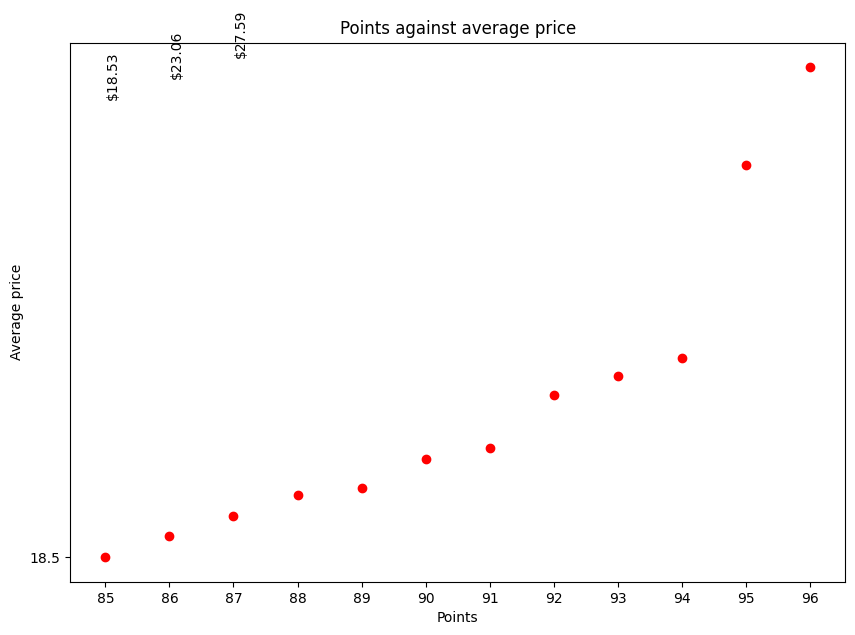

In [36]:
# points against average price and group by points
points_price = df[['points', 'price']].groupby('points').mean()

# min and max of price
price_min = points_price['price'].min()
price_max = points_price['price'].max()

# min and max of points
point_min = points_price.index.min()
point_max = points_price.index.max()

# Plot points against average price
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(points_price.index, points_price, 'ro')
ax.set_title('Points against average price')
ax.set_xlabel('Points')
ax.set_ylabel('Average price')
ax.set_xticks(np.arange(point_min, point_max+1, 1))
ax.set_yticks(np.arange(price_min, price_max+1, 200.0))
for i, p in enumerate(points_price['price']):
  ax.annotate(f'${p:.2f}', (points_price.index[i], p+100), rotation=90)
plt.show()

First I only retrieve the data of points and price from entire dataset and group them by points and then find out average price for each points. It look like this in a table form.
I create a plot that use points against price.

Here I can see a pattern. Pattern that point goes up price goes up. Between points 80 ~ 94, the price goes up gradually, in contrast, price goes up dramatically from 91 ~ 96.

This graph also shows that there is a positive correlation between points and price.

# points and price in scatter chart
I would like to plot point and price in scatter chart

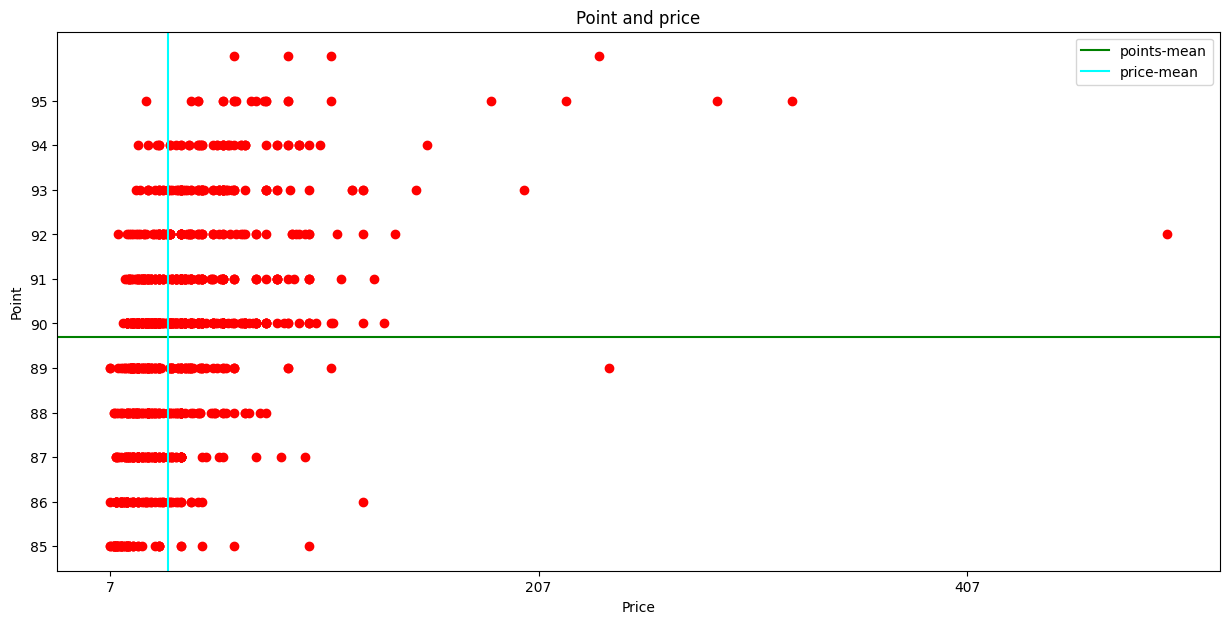

In [56]:
# get points and price columns
points_and_price = df[['points', 'price']]

# mean of points and price
points_mean = points_and_price['points'].mean()
price_mean = points_and_price['price'].median()

# min and max of points
points_min = points_and_price['points'].min()
points_max = points_and_price['points'].max()

# min and max of price
price_min = points_and_price['price'].min()
price_max = points_and_price['price'].max()

# plot scatter chart on points & price
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(points_and_price['price'], points_and_price['points'], color='red')
ax.set_title('Point and price')
ax.set_xlabel('Price')
ax.set_ylabel('Point')
ax.set_xticks(np.arange(price_min, price_max, 200.0))
ax.set_yticks(np.arange(points_min, points_max, 1))
points_mean_line = ax.axhline(points_mean, color='green')
price_mean_line = ax.axvline(price_mean, color='cyan')
ax.legend([points_mean_line, price_mean_line],
          ['points-mean', 'price-mean'])
fig.savefig("points_and_price.png")
plt.show()

With scatter chart I can see each data points clearly.

# Correlation between points and price

I know there is a positive correlation between points and price, but is there a measurement to measure correlation? Correlation coefficient

In [42]:
# get points and price columns
points_and_price = df[['points', 'price']]

# find out correlation matrix between points and price
coef_correlation = points_and_price.corr()
coef_correlation

,points,price
points,1.00000,0.42879
price,0.42879,1.00000


From the table points to points has 1 the strongest relationship while points to price has 0.4 between non to medium relationship.

Let’s see in heatmap (a matrix form)

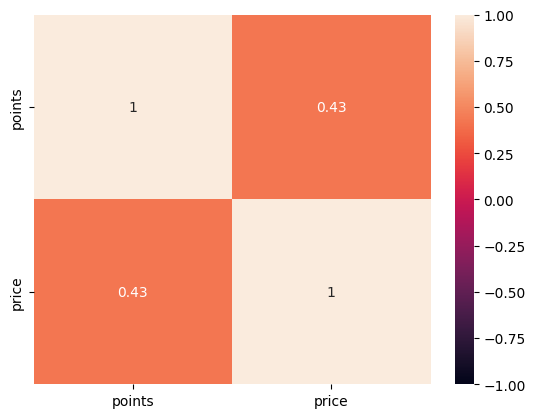

In [43]:
sns.heatmap(coef_correlation, annot=True, vmin=-1.0, vmax=1.0);


To understand points and price from dataset, I can use pandas and matplotlib, as well as, seaborn to help me. I have seen how points and price data spread and their distribution. In addition, I find out there is a slight positive correlation between points and price.

# Finding out number of wineries in country

I would like to see the number of wineries in country.

First I need to group data by country and winery.

In [44]:
# Group by countr and winery
country_winery_group = df[['country', 'winery']].groupby(['country', 'winery']).count()

# Show first 10 countries
country_winery_group

Empty DataFrame
Columns: []
Index: [(Argentina, Bodega Las Ca√±itas), (Argentina, Bodega Renacer), (Argentina, Bota Box), (Argentina, Chakana), (Argentina, Cruzat), (Argentina, Domaine Jean Bousquet), (Argentina, Don Miguel Gasc√≥n), (Argentina, Finca Las Moras), (Argentina, Finca la Malena), (Argentina, Lamadrid), (Argentina, Matias Riccitelli), (Argentina, Navarro Correas), (Argentina, Pascual Toso), (Argentina, Piattelli), (Argentina, Proemio), (Argentina, Quara), (Argentina, The Seeker), (Argentina, Trapiche), (Argentina, Tupun), (Argentina, Verum), (Argentina, Via Revolucionaria), (Argentina, Vi√±a Cobos), (Argentina, Vi√±alba), (Argentina, Zorzal), (Australia, D'Arenberg), (Australia, Dalrymple), (Australia, Giant Steps), (Australia, Heggies Vineyard), (Australia, Moorooduc), (Australia, Riposte), (Austria, Johanneshof Reinisch), (Austria, Meinklang), (Austria, Muhr-Van der Niepoort), (Austria, Schwarz Wein), (Bulgaria, Castra Rubra), (Bulgaria, Edoardo Miroglio), (Bulgaria, Villa Melnik), (Bulgaria, Vini), (Canada, Burrowing Owl), (Canada, Cave Spring), (Canada, Mission Hill), (Canada, Tinhorn Creek), (Chile, Caliterra), (Chile, Casa Donoso), (Chile, Claro), (Chile, Concha y Toro), (Chile, Estampa), (Chile, Koyle), (Chile, Maquis), (Chile, Maray), (Chile, Primus), (Chile, Ritual), (Chile, San Pedro), (Chile, Santa Alba), (Chile, Santa Ema), (Chile, Viu Manent), (Chile, Vi√±a Bisquertt), (Chile, Von Siebenthal), (Croatia, Bibich), (France, A.R. Lenoble¬†), (France, Albert Bichot), (France, Au Pied du Mont Chauve), (France, Aubry), (France, Beno√Æt Daridan), (France, Beno√Æt Girard), (France, Boeckel), (France, Bouvet-Ladubay), (France, Chanson P√®re et Fils), (France, Chartron et Tr√©buchet), (France, Chateau Quattre), (France, Cherrier Fr√®res), (France, Ch√¢teau Beauregard Lagupeau), (France, Ch√¢teau Bouissel), (France, Ch√¢teau Bovila), (France, Ch√¢teau B√©lingard), (France, Ch√¢teau Chantemerle), (France, Ch√¢teau Chaubinet), (France, Ch√¢teau Cl√©ment Termes), (France, Ch√¢teau Coutinel), (France, Ch√¢teau Devise d'Ardilley), (France, Ch√¢teau Favray), (France, Ch√¢teau Ferran), (France, Ch√¢teau Fongalan), (France, Ch√¢teau Gassier), (France, Ch√¢teau Gazin Rocquencourt), (France, Ch√¢teau Grand Boise), (France, Ch√¢teau Haut Selve), (France, Ch√¢teau Lafargue), (France, Ch√¢teau Lagr√©zette), (France, Ch√¢teau Lalande Mausse), (France, Ch√¢teau Lalaudey), (France, Ch√¢teau Larrivet Haut-Brion), (France, Ch√¢teau Luchey-Halde), (France, Ch√¢teau Magnol), (France, Ch√¢teau Manc√®dre), (France, Ch√¢teau Marsau), (France, Ch√¢teau Mezain), (France, Ch√¢teau Peugeais), (France, Ch√¢teau Peyfaures), (France, Ch√¢teau P√©gau), ...]

[848 rows x 0 columns]

Secondly, I need to transform this DataFrame into a new DataFrame which has information of country name and number of wineries.


In [45]:
# Transform country and winery into dictionary of winery and number 
winery_num_dict = {}
for i in country_winery_group.index:
  if i[0] in winery_num_dict:
    winery_num_dict[i[0]] += 1
  else:
    winery_num_dict[i[0]] = 1

# Convert to a new DataFrame
country_winery = pd.DataFrame({
    'country': list(winery_num_dict.keys()),
    'winery': list(winery_num_dict.values())
})

# Sort by winery in descending order
country_winery.sort_values(['winery'], ascending=False)

,country,winery
21,US,372
12,Italy,142
7,France,133
20,Spain,56
16,Portugal,38
0,Argentina,24
8,Germany,21
5,Chile,16
19,South Africa,8
11,Israel,7


Looks like US have more wineries than other countries.

# Top 10 countries by their average points

Let's find out top 10 countries by their average points

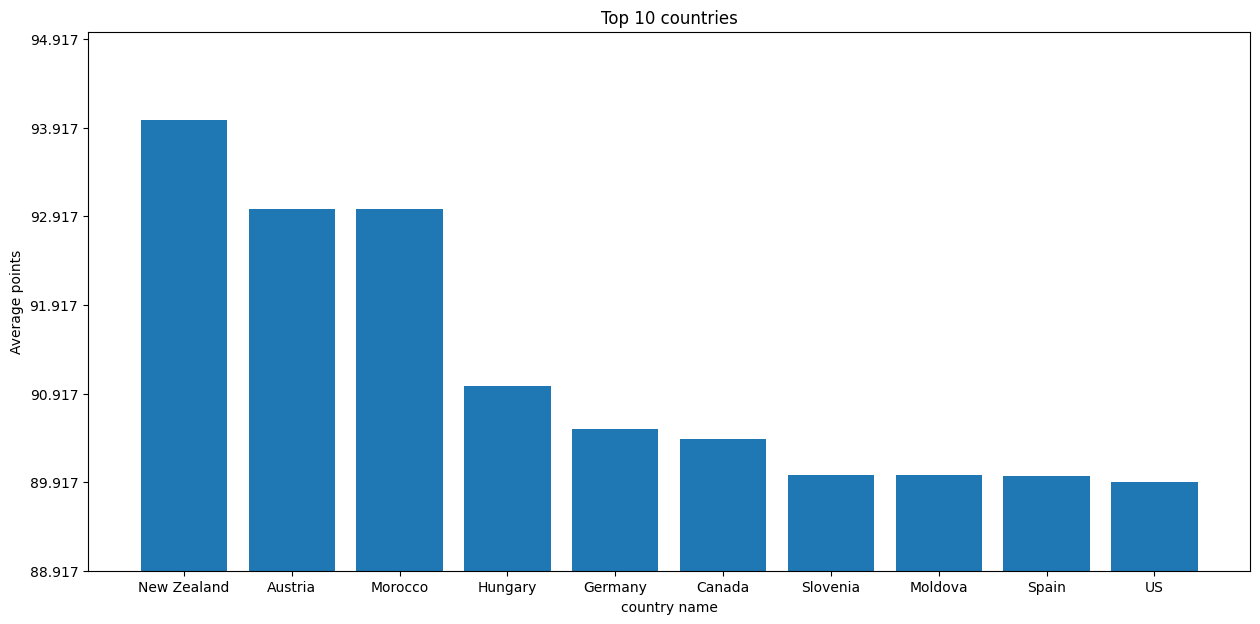

In [57]:
# Group by country and calcuate mean of points for each countries
country_points_mean = df[['country', 'points']].groupby('country').mean()

# Sort by points in descending order
country_sorted_by_points = country_points_mean.sort_values('points', ascending=False)

# Get first 10 countries
top_10_countries = country_sorted_by_points[:10]

# Plot
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(top_10_countries.index, top_10_countries['points'].values)
ax.set_title('Top 10 countries')
ax.set_xlabel('country name')
ax.set_ylabel('Average points')
ax.set_ylim(top_10_countries['points'].values.min(),
            top_10_countries['points'].values.max()+1)
ax.set_yticks(np.arange(top_10_countries['points'].values.min()-1,
                        top_10_countries['points'].values.max()+1,
                        1))
fig.savefig("top10_countries_averagepoints.png")
plt.show()

It looks like New Zealand had earn the most points in average follow by Austria and Morocco.

# Top 10 variety that had been used to produce wine

Similar to top 10 countries, I can explore top 10 variety.

In [48]:
top_10_variety = df['variety'].value_counts()[:10]
top_10_variety

Pinot Noir                  128
Chardonnay                  103
Cabernet Sauvignon           89
Red Blend                    70
Nebbiolo                     54
Riesling                     51
Bordeaux-style Red Blend     48
Portuguese Red               42
Sauvignon Blanc              36
Syrah                        35
Name: variety, dtype: int64

Presenting data visually with histogram.

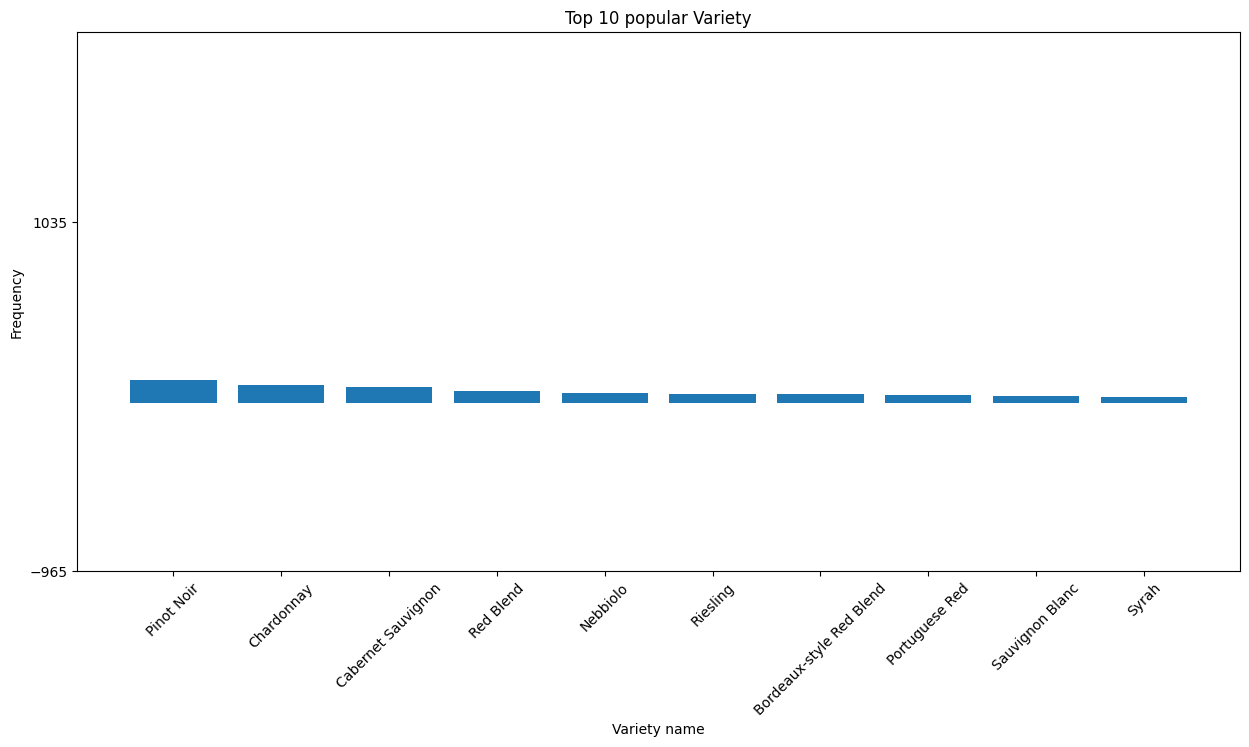

In [58]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.bar(top_10_variety.index, top_10_variety.values)
ax.set_title('Top 10 popular Variety')
ax.set_xlabel('Variety name',)
ax.set_ylabel('Frequency')
ax.set_ylim(top_10_variety.values.min()-1000,
            top_10_variety.values.max()+2000)
ax.set_yticks(np.arange(top_10_variety.values.min()-1000,
                        top_10_variety.values.max()+2000,
                        2000))
plt.xticks(rotation=45, fontsize=10)
fig.savefig("top10_popular_variety.png")
plt.show()

From the histogram graph I view Pinot Noir which is type of variety and very popular in wine production worldwide. Chardonnay and Cabernet Sauvignon are popular as well.

Conclusion: 
From the data analysis, I can see there are many wineries in US compare to other countries. Analysis tell me that having many wineries doesn’t mean the country produce fine wine. The average points for wines from England is the highest among of countries.

I also look into popular provinces to produce wine in country. There are many grapes had been used to produce variety of wines and from the histogram I can say that Pinot Noir Chardonnay and Cabernet Sauvignon are quite popular.